# FACEBOOK DATA FROM YAHOO FINANCE

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("C:/Users/ASUS/Desktop/FMI/Licenta OB/Overall Code/packtpub-src/csv/FB2012-2019.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-29,31.480000,31.690001,28.650000,28.840000,28.840000,78063400
1,2012-05-30,28.700001,29.549999,27.860001,28.190001,28.190001,57267900
2,2012-05-31,28.549999,29.670000,26.830000,29.600000,29.600000,111639200
3,2012-06-01,28.889999,29.150000,27.389999,27.719999,27.719999,41855500
4,2012-06-04,27.200001,27.650000,26.440001,26.900000,26.900000,35230300


In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1755,2019-05-21,184.570007,185.699997,183.889999,184.820007,184.820007,7502800
1756,2019-05-22,184.729996,186.740005,183.610001,185.320007,185.320007,9213800
1757,2019-05-23,182.419998,183.899994,179.669998,180.869995,180.869995,12768800
1758,2019-05-24,182.330002,183.630005,180.830002,181.059998,181.059998,8807700
1759,2019-05-28,181.539993,184.710007,181.449997,184.309998,184.309998,14843300


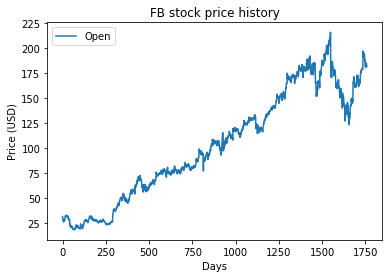

In [5]:
plt.figure()
plt.title("FB stock price history")
plt.plot(df['Open'])
#plt.plot(df["Close"])
#plt.plot(df["High"])
#plt.plot(df["Low"])
plt.ylabel('Price (USD)')
plt.xlabel('Days')
plt.legend(['Open', 'Close', 'High', 'Low'], loc='upper left')
plt.show()

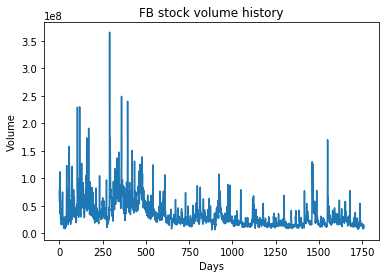

In [6]:
plt.figure()
plt.plot(df['Volume'])
plt.title('FB stock volume history')
plt.ylabel('Volume')
plt.xlabel('Days')
plt.show()

In [7]:
print('Checking if any null values are present\n', df.isna().sum())

Checking if any null values are present
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


### Normalizing the data
* Split the data into train, test
* Normalize
* Covert the DataFrame to ndarray

In [8]:
#! pip install keras

In [9]:
#! pip install np_utils

In [10]:
#! pip install tensorflow

In [11]:
#! pip install numpy --upgrade --user

In [12]:
from tqdm._tqdm_notebook import tqdm_notebook
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout
from keras.layers import LSTM
from keras import optimizers
from keras import backend as K

print('Checking GPU available', K.tensorflow_backend._get_available_gpus())


Using TensorFlow backend.


Checking GPU available []


In [13]:
from keras import losses

In [14]:
TIME_STEPS = 60
BATCH_SIZE = 20

In [15]:
params = {
    "batch_size": 20,  # 20<16<10, 25 was a bust
    "epochs": 300,
    "lr": 0.00010000,
    "time_steps": 60
}

In [16]:

train_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
df_train, df_test = train_test_split(df, train_size=0.8, test_size=0.2, shuffle=False)
print('Train and test set', len(df_train), len(df_test))

#scale the feature MinMax, build array
x = df_train.loc[:, train_cols].values
min_max_scaler = MinMaxScaler()
x_train = min_max_scaler.fit_transform(x)
x_test = min_max_scaler.transform(df_test.loc[:, train_cols])

Train and test set 1408 352


In [20]:
def create_model():
    lstm_model = Sequential()
    # (batch_size, time_steps, data_dim)
    lstm_model.add(LSTM(100, batch_input_shape=(BATCH_SIZE, TIME_STEPS, x_t.shape[2]),
                       dropout=0.0, recurrent_dropout=0.0, stateful=True, return_sequences=True,
                       kernel_initializer='random_uniform'))
    lstm_model.add(Dropout(0.4))
    lstm_model.add(LSTM(60, dropout=0.0))
    lstm_model.add(Dropout(0.4))
    lstm_model.add(Dense(20, activation='relu'))
    lstm_model.add(Dense(1, activation='linear'))
    optimizer = optimizers.RMSprop(lr=params['lr'])
    lstm_model.compile(loss='mean_squared_error', optimizer=optimizer)
    # lstm_model.compile(loss=losses.mean_squarred_error, optimizer=optimizer)
    return lstm_model

In [21]:
model = create_model()

#csv_logger = CSVLogger()

history = model.fit(x_t, y_t, epochs=params['epochs'], verbose=2, batch_size=BATCH_SIZE,
                   shuffle=False, validation_data=(trim_dataset(x_val, BATCH_SIZE), 
                                                   trim_dataset(y_val, BATCH_SIZE))) #,callbacks=[es, mcp, csv_logger]

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 1340 samples, validate on 140 samples
Epoch 1/300
 - 6s - loss: 0.0079 - val_loss: 0.0047
Epoch 2/300
 - 4s - loss: 0.0078 - val_loss: 0.0039
Epoch 3/300
 - 4s - loss: 0.0066 - val_loss: 0.0060
Epoch 4/300
 - 3s - loss: 0.0049 - val_loss: 0.0141
Epoch 5/300
 - 3s - loss: 0.0048 - val_loss: 0.0038
Epoch 6/300
 - 3s - loss: 0.0048 - val_loss: 0.0052
Epoch 7/300
 - 3s - loss: 0.0044 - val_loss: 0.0042
Epoch 8/300
 - 3s - loss: 0.0041 - val_loss: 0.0056
Epoch 9/300
 - 3s - loss: 0.0039 - val_loss: 0.0057
Epoch 10/300
 - 3s - loss: 0.0037 - val_loss: 0.0045
Epoch 11/300
 - 3s - loss: 0.0033 - val_loss: 0.0045
Epoch 12/300
 - 3s - loss: 0.0037 - val_loss: 0.0037
Epoch 13/300
 - 3s - loss: 0.0031 - val_loss: 0.0075
Epoch 14/300
 - 3s - loss: 0.0039 - va

Epoch 137/300
 - 3s - loss: 0.0013 - val_loss: 0.0053
Epoch 138/300
 - 3s - loss: 0.0013 - val_loss: 0.0036
Epoch 139/300
 - 3s - loss: 0.0012 - val_loss: 0.0039
Epoch 140/300
 - 3s - loss: 0.0012 - val_loss: 0.0056
Epoch 141/300
 - 3s - loss: 0.0011 - val_loss: 0.0031
Epoch 142/300
 - 3s - loss: 0.0012 - val_loss: 0.0035
Epoch 143/300
 - 3s - loss: 0.0011 - val_loss: 0.0026
Epoch 144/300
 - 3s - loss: 0.0012 - val_loss: 0.0027
Epoch 145/300
 - 3s - loss: 0.0012 - val_loss: 0.0069
Epoch 146/300
 - 3s - loss: 0.0011 - val_loss: 0.0066
Epoch 147/300
 - 3s - loss: 0.0012 - val_loss: 0.0067
Epoch 148/300
 - 3s - loss: 0.0011 - val_loss: 0.0042
Epoch 149/300
 - 3s - loss: 0.0012 - val_loss: 0.0059
Epoch 150/300
 - 3s - loss: 0.0012 - val_loss: 0.0052
Epoch 151/300
 - 3s - loss: 0.0011 - val_loss: 0.0042
Epoch 152/300
 - 3s - loss: 0.0011 - val_loss: 0.0031
Epoch 153/300
 - 3s - loss: 0.0012 - val_loss: 0.0042
Epoch 154/300
 - 3s - loss: 0.0012 - val_loss: 0.0057
Epoch 155/300
 - 3s - loss: 

Epoch 286/300
 - 3s - loss: 9.9362e-04 - val_loss: 0.0023
Epoch 287/300
 - 3s - loss: 0.0010 - val_loss: 0.0033
Epoch 288/300
 - 3s - loss: 9.6344e-04 - val_loss: 0.0027
Epoch 289/300
 - 3s - loss: 0.0010 - val_loss: 0.0034
Epoch 290/300
 - 3s - loss: 8.9590e-04 - val_loss: 0.0023
Epoch 291/300
 - 3s - loss: 0.0010 - val_loss: 0.0026
Epoch 292/300
 - 3s - loss: 9.8107e-04 - val_loss: 0.0025
Epoch 293/300
 - 3s - loss: 9.7646e-04 - val_loss: 0.0042
Epoch 294/300
 - 3s - loss: 9.3384e-04 - val_loss: 0.0055
Epoch 295/300
 - 3s - loss: 0.0011 - val_loss: 0.0033
Epoch 296/300
 - 4s - loss: 9.8189e-04 - val_loss: 0.0049
Epoch 297/300
 - 4s - loss: 9.3223e-04 - val_loss: 0.0048
Epoch 298/300
 - 3s - loss: 9.9297e-04 - val_loss: 0.0051
Epoch 299/300
 - 4s - loss: 9.7539e-04 - val_loss: 0.0024
Epoch 300/300
 - 3s - loss: 0.0010 - val_loss: 0.0023


In [22]:
print(history.history.keys())
print(history.history['val_loss'])

dict_keys(['val_loss', 'loss'])
[0.004723973106592894, 0.003945107787980565, 0.00603987875261477, 0.014111240194844348, 0.003792370170620935, 0.005237083798939628, 0.004211737025928285, 0.005568436280425105, 0.005747986308831189, 0.004536245883043323, 0.004482758630599294, 0.0037385904496269567, 0.007502841164491006, 0.005342763183372361, 0.01663471878107105, 0.0043172833725943095, 0.005147161760500499, 0.0037676394235209693, 0.003280490936179246, 0.005534280399193189, 0.007416386672827814, 0.005843848913043205, 0.005433598749472627, 0.005791804761559304, 0.003151698802996959, 0.004319209297786334, 0.008679425826163165, 0.0031858967683677164, 0.012376647342794709, 0.0051366449416881165, 0.007167346642485687, 0.0045373622976642635, 0.005824525815634323, 0.0038479052849912216, 0.008282855336022164, 0.005434465677743512, 0.008277538465335965, 0.003109156303772969, 0.008401659151007022, 0.0034786307286205037, 0.006849628008369889, 0.0037476567418447564, 0.003000281784417374, 0.005067689959

Text(0, 0.5, 'Model loss')

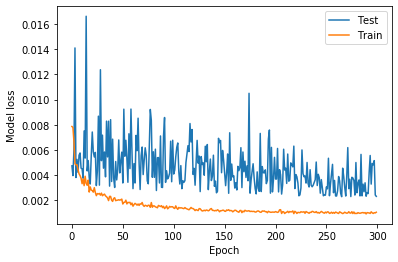

In [28]:
plt.figure()
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.legend(['Test', 'Train'])
plt.xlabel('Epoch')
plt.ylabel('Model loss')

In [24]:
# plot the predicted vs real price

In [25]:
y_pred = model.predict(trim_dataset(x_test_t, BATCH_SIZE), batch_size=BATCH_SIZE)
y_pred = y_pred.flatten()
y_test_t = trim_dataset(y_test_t, BATCH_SIZE)
error = mean_squared_error(y_test_t, y_pred)
print("Error", y_pred.shape, y_test_t.shape)

y_pred_orig = (y_pred * min_max_scaler.data_range_[3]) + min_max_scaler.data_min_[3] #min_max_scaler.inverse_transform(y_pred)
y_test_t_orig = (y_test_t * min_max_scaler.data_range_[3]) + min_max_scaler.data_min_[3] #min_max_scaler.inverse_transform(y_test_t)

Error (140,) (140,)


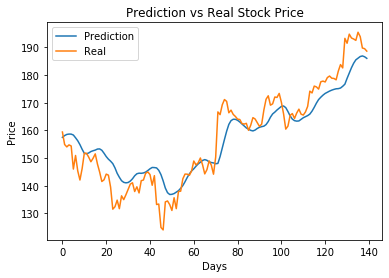

In [26]:
plt.figure()
plt.plot(y_pred_orig)
plt.plot(y_test_t_orig)
plt.title('Prediction vs Real Stock Price')
plt.ylabel('Price')
plt.xlabel('Days')
plt.legend(['Prediction', 'Real'], loc='upper left')
plt.show()

In [27]:
# do gridsearch, put logging into
# what overfit would mean here?
# read lstm AK
# how to appreciate how good is the prediction?

# sentiment analysis for stock prediction ? X

